<a href="https://colab.research.google.com/github/spqr-86/notebooks/blob/main/%22%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_EDA_%D0%91%D0%B0%D0%BB%D0%B4%D0%B0%D0%B5%D0%B2_%D0%94%D1%8E%D0%BA%D0%BE%D0%B2_%D0%A0%D0%B0%D0%B3%D1%83%D0%BB%D0%B8%D0%BD%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import folium
from folium import plugins, branca
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import linregress



Предварительная обработка данных, поисковый анализ.

In [ ]:
#объединение датасетов в один, новые колонки город(название), день недели(будний = 0, выходной = 1)
cities = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
df_cities = []
for city in cities:
    weekdays = pd.read_csv('/content/' + city + '_weekdays.csv', index_col=0)
    weekends = pd.read_csv('/content/' + city + '_weekends.csv', index_col=0)
    weekdays['day_of_week'] = 0
    weekends['day_of_week'] = 1
    weekdays['city'] = city.title()
    weekends['city'] = city.title()
    df_cities.append(weekdays)
    df_cities.append(weekends)
city_total = pd.concat(df_cities, ignore_index=True)

In [ ]:
city_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
city_total = city_total.round({'realSum': 2, 'dist': 3, 'metro_dist': 3, 'attr_index': 2, 'attr_index_norm': 2, 'rest_index': 2, 'rest_index_norm': 2})

In [ ]:
# кол-во дубликатов
city_total.duplicated().sum()

40

In [ ]:
city_total.drop_duplicates()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_of_week,city
0,194.03,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.023,2.539,78.69,4.17,98.25,6.85,4.90569,52.41772,0,Amsterdam
1,344.25,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488,0.239,631.18,33.42,837.28,58.34,4.90005,52.37432,0,Amsterdam
2,264.10,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748,3.652,75.28,3.99,95.39,6.65,4.97512,52.36103,0,Amsterdam
3,433.53,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.385,0.440,493.27,26.12,875.03,60.97,4.89417,52.37663,0,Amsterdam
4,485.55,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.545,0.319,552.83,29.27,815.31,56.81,4.90051,52.37508,0,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.94,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530,0.135,219.40,15.71,438.76,10.60,16.37940,48.21136,1,Vienna
51703,304.79,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810,0.101,204.97,14.68,342.18,8.27,16.38070,48.20296,1,Vienna
51704,637.17,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994,0.203,169.07,12.11,282.30,6.82,16.38568,48.20460,1,Vienna
51705,301.05,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044,0.287,109.24,7.82,158.56,3.83,16.34100,48.19200,1,Vienna


In [ ]:
city_total.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
day_of_week                     int64
city                           object
dtype: object

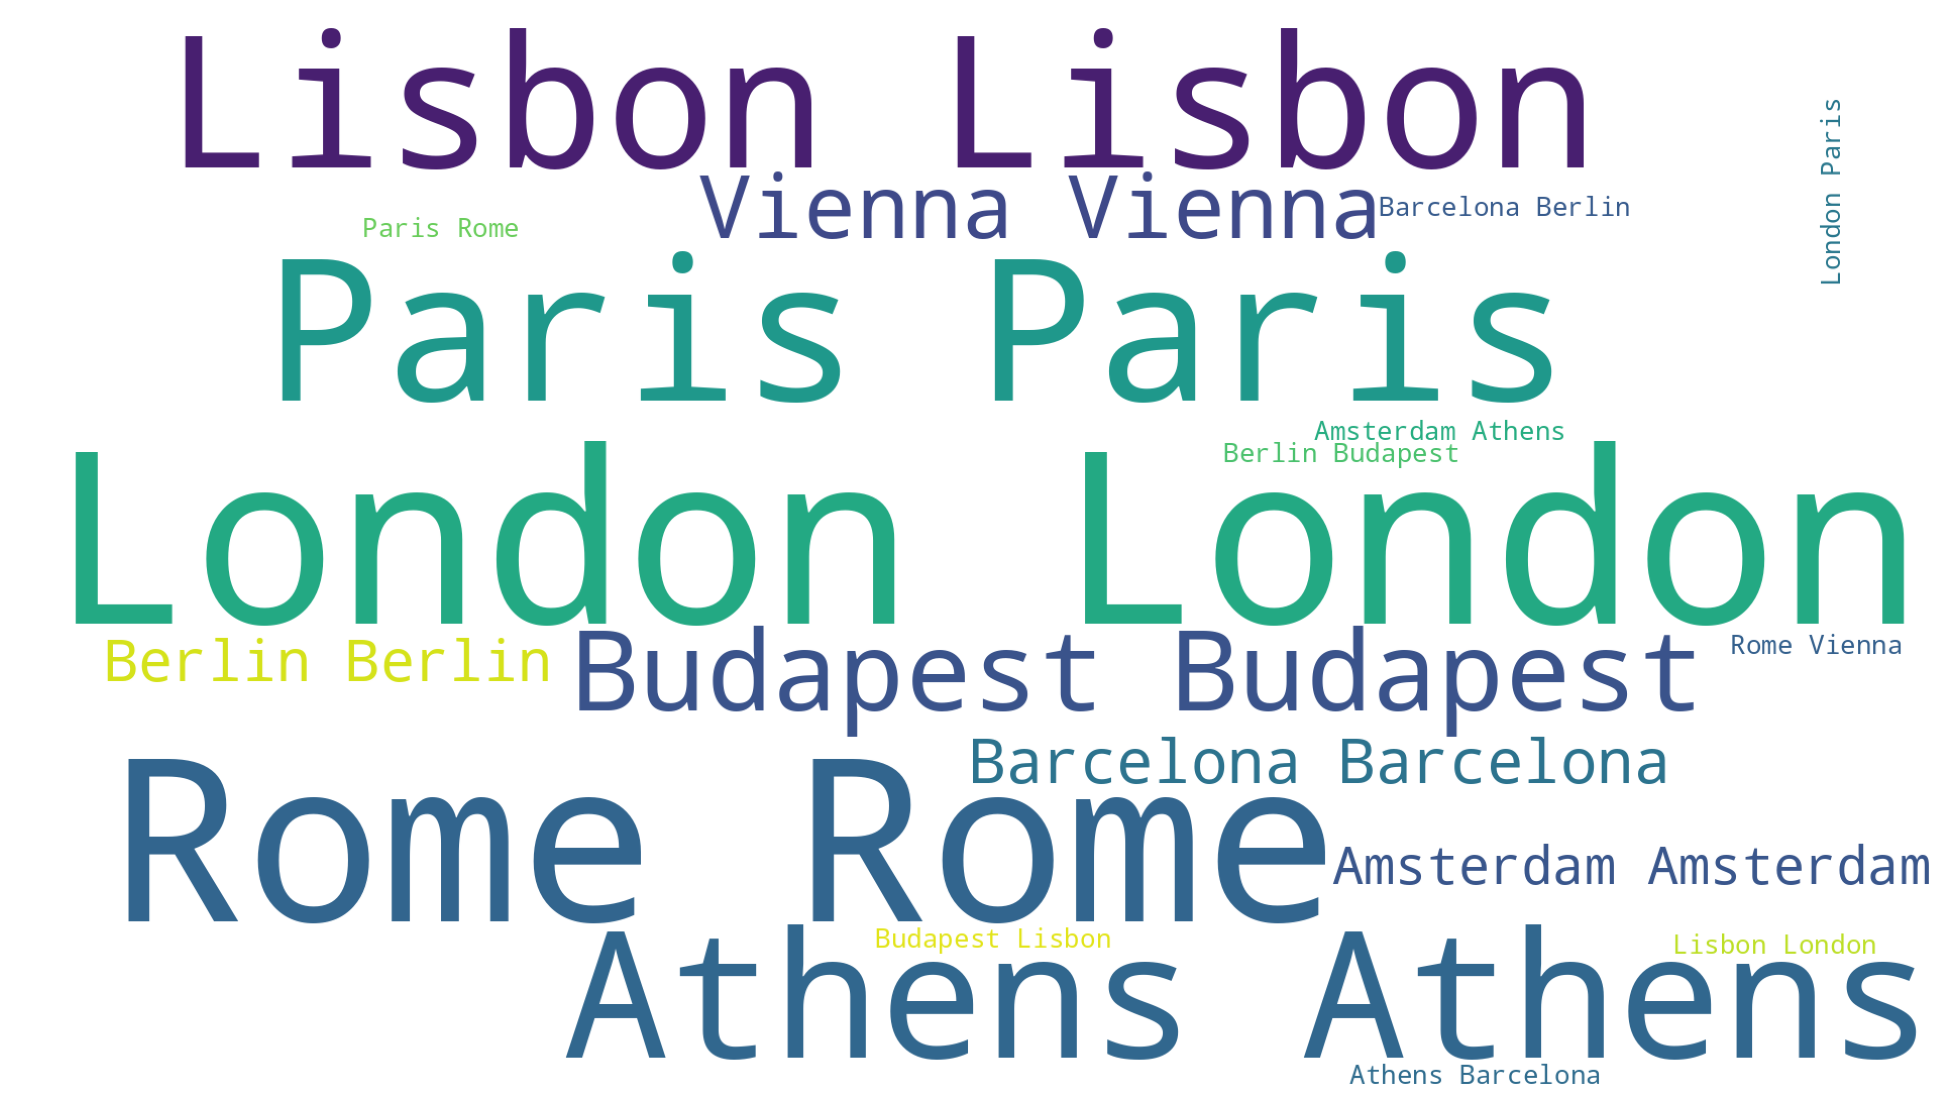

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',
                      width=1920,
                      height=1080
                      ).generate(" ".join(city_total.city))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('city.png')
plt.show()
#захотелось сделать такую визуализацию). Какие города больше всего представлены

<ipython-input-16-6a9b1243d8cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = city_total.corr(method='pearson')


Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'day_of_week', 'city'],
      dtype='object')

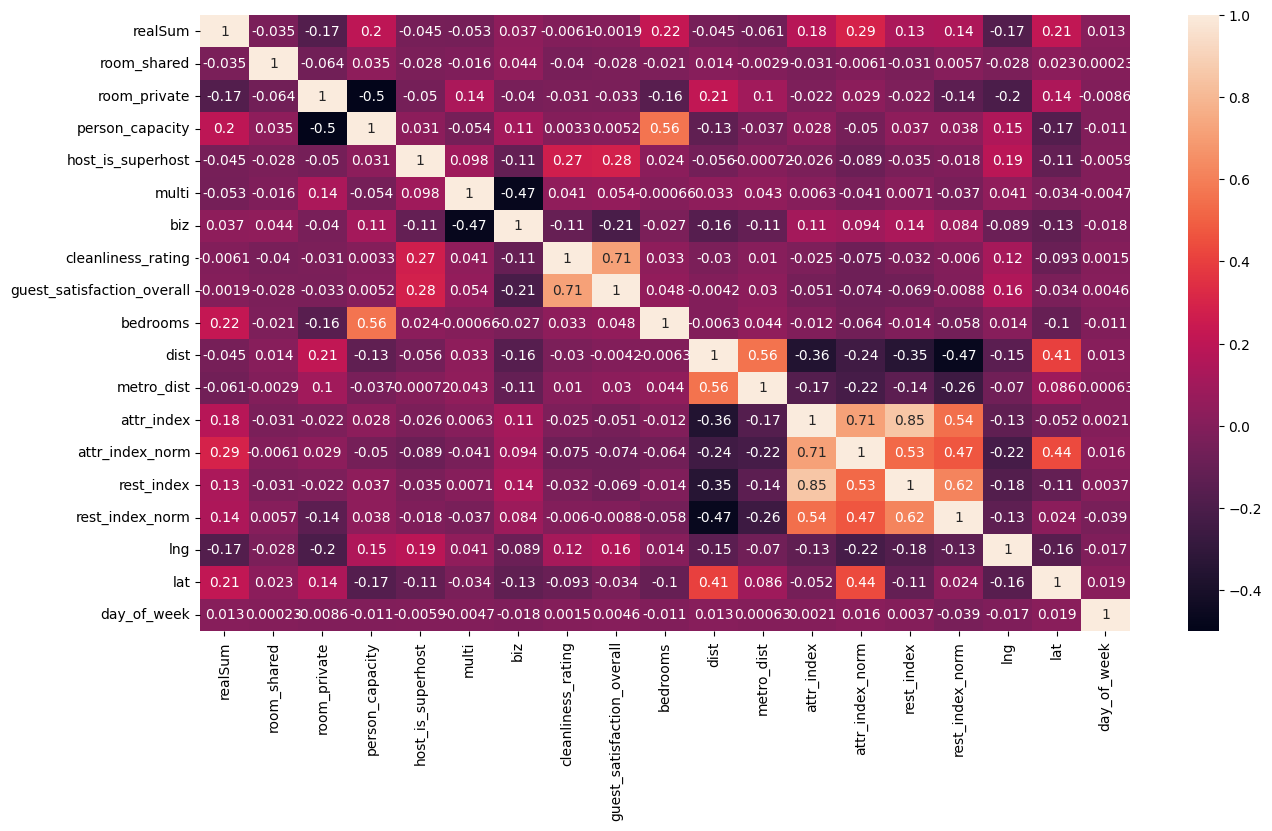

In [ ]:
corr = city_total.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
city_total.columns

#корелляция, видно, что в основно кореллируют показатели удовлетворенности и сводные индексы

In [ ]:
city_cost = city_total.groupby('city')['realSum'].median()
city_cost =  pd.DataFrame({'city': city_cost.index, 'realSum': city_cost.values})
city_cost
#поиск самых дорогих городов для проживания

,city,realSum
0,Amsterdam,460.245
1,Athens,127.720
2,Barcelona,208.300
3,Berlin,191.180
4,Budapest,152.980
5,Lisbon,225.380
6,London,261.290
7,Paris,317.600
8,Rome,182.590
9,Vienna,208.490


Text(0, 0.5, 'City Price')

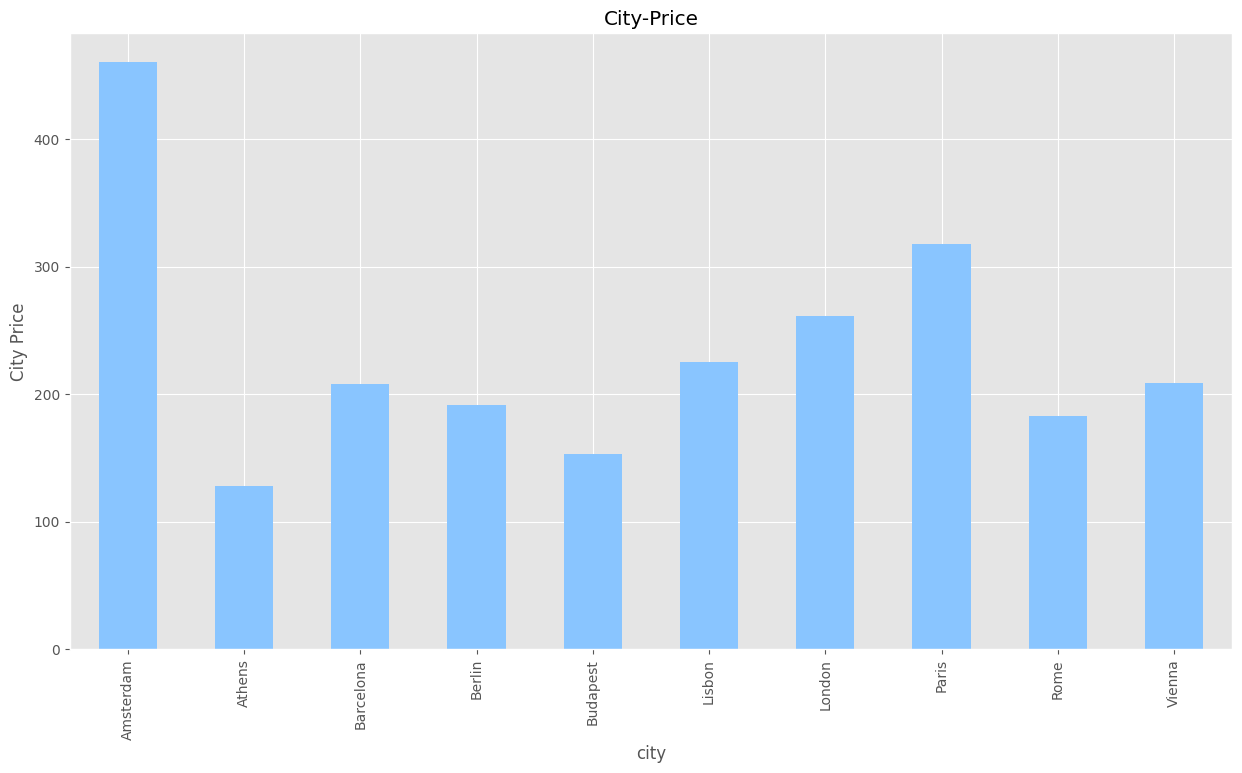

In [ ]:
plt.style.use('ggplot')

objects = city_cost['city']
y_pos = city_cost['realSum']

city_cost.plot(kind='bar', 
           x='city',
           y='realSum',
           color = '#89c5ff', 
           figsize =(15,8), 
           title = 'City-Price', 
           legend = False)

plt.ylabel('City Price')

In [ ]:
city_satisfaction = city_total.groupby('city')['guest_satisfaction_overall'].mean()
city_satisfaction =  pd.DataFrame({'city': city_satisfaction.index, 'guest_satisfaction_overall': city_satisfaction.values})
city_satisfaction
#города, которые больше всего понравились

,city,guest_satisfaction_overall
0,Amsterdam,94.514423
1,Athens,95.003598
2,Barcelona,91.109072
3,Berlin,94.323671
4,Budapest,94.585281
5,Lisbon,91.093875
6,London,90.645652
7,Paris,92.037530
8,Rome,93.122300
9,Vienna,93.731128


Text(0, 0.5, 'City Satisfaction')

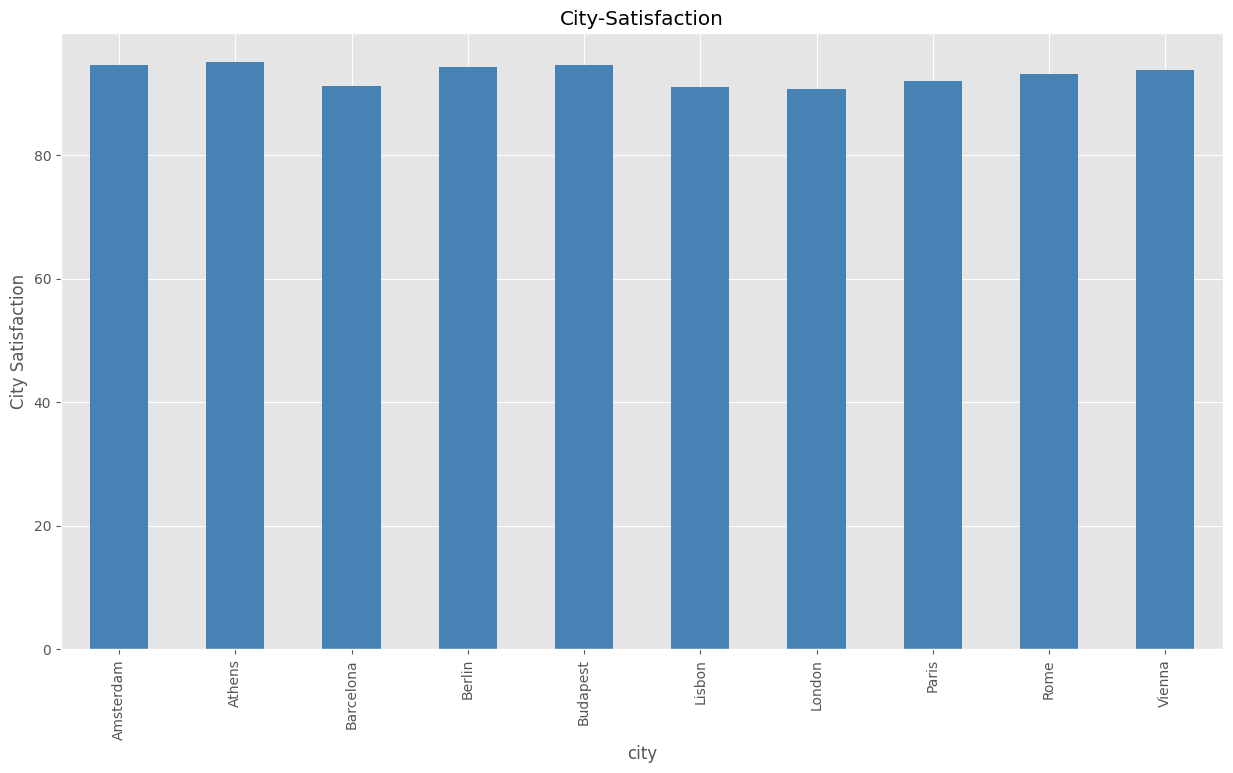

In [ ]:
plt.style.use('ggplot')

objects = city_satisfaction['city']
y_pos = city_satisfaction['guest_satisfaction_overall']

city_satisfaction.plot(kind='bar', 
           x='city',
           y='guest_satisfaction_overall',
           color = 'steelblue', 
           figsize =(15,8), 
           title = 'City-Satisfaction', 
           legend = False)

plt.ylabel('City Satisfaction')

<Axes: xlabel='guest_satisfaction_overall', ylabel='city'>

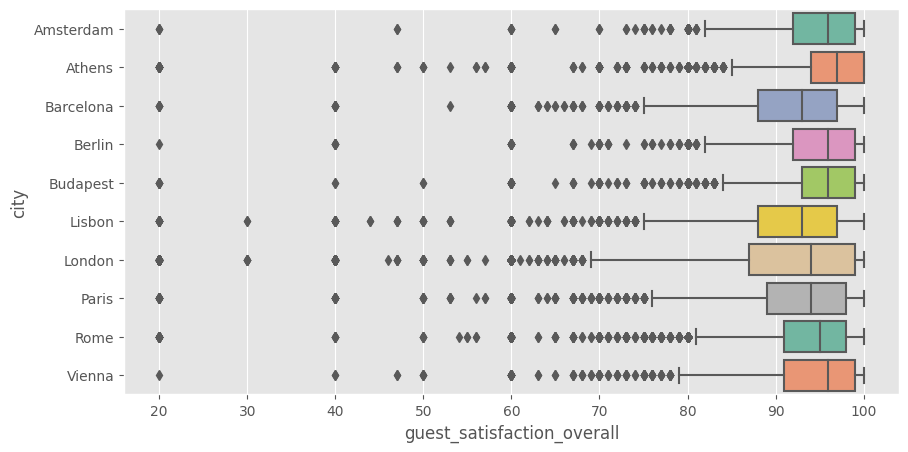

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(y = "city", x = "guest_satisfaction_overall", data = city_total, palette="Set2")
#разброс оценок, есть и плохие, лондон самый неоднозначный

In [ ]:
city_cleanliness = city_total.groupby('city')['cleanliness_rating'].mean()
city_cleanliness =  pd.DataFrame({'city': city_cleanliness.index, 'cleanliness_rating': city_cleanliness.values})
city_cleanliness
#какой город самый чистый

,city,cleanliness_rating
0,Amsterdam,9.465865
1,Athens,9.638447
2,Barcelona,9.291564
3,Berlin,9.461755
4,Budapest,9.477374
5,Lisbon,9.370640
6,London,9.175023
7,Paris,9.263606
8,Rome,9.514678
9,Vienna,9.472434


Text(0, 0.5, 'City Cleanliness')

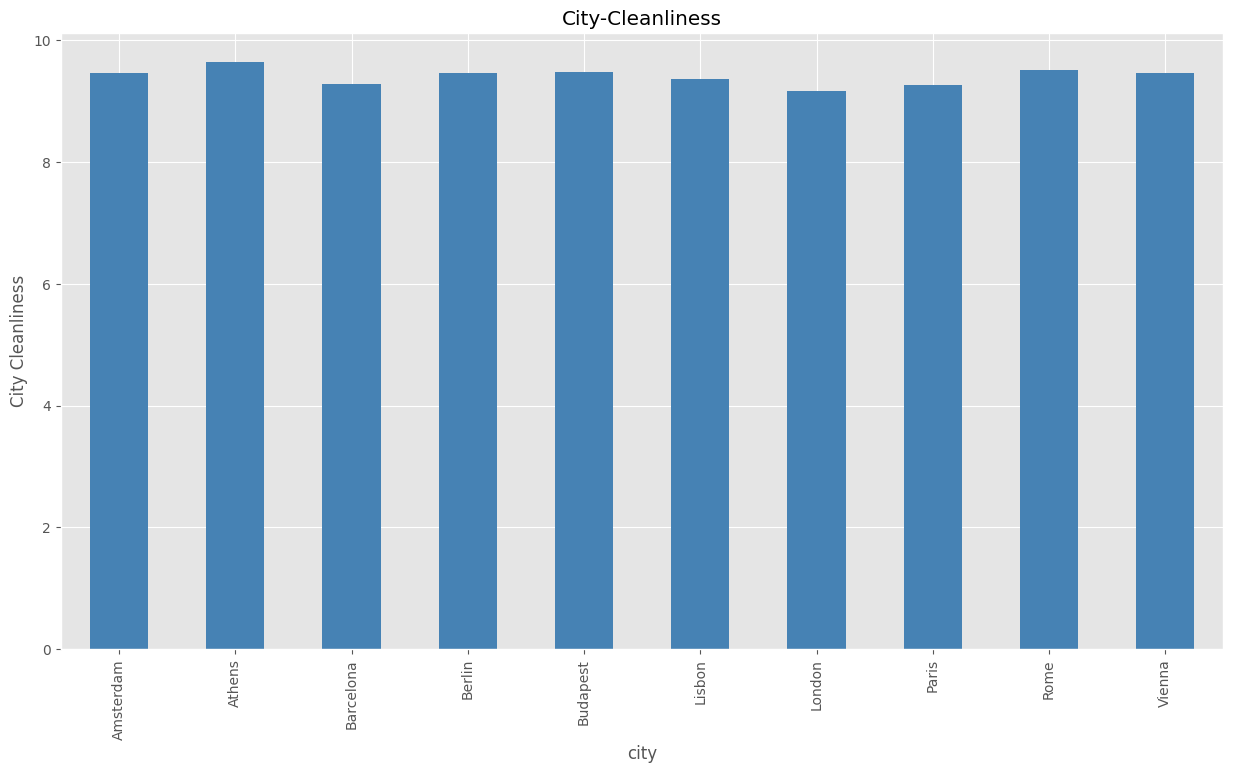

In [ ]:
plt.style.use('ggplot')

objects = city_cleanliness['city']
y_pos = city_cleanliness['cleanliness_rating']

city_cleanliness.plot(kind='bar', 
           x='city',
           y='cleanliness_rating',
           color = 'steelblue', 
           figsize =(15,8), 
           title = 'City-Cleanliness', 
           legend = False)

plt.ylabel('City Cleanliness')

Гипотеза:
за предложения с более высокой оценки готовы платить больше

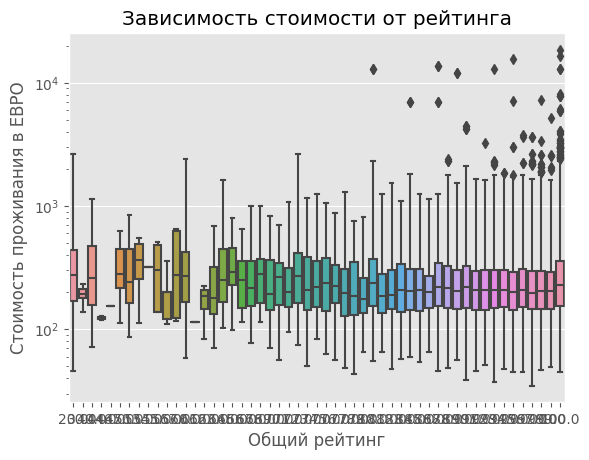

In [ ]:
sns.boxplot(x='guest_satisfaction_overall', y='realSum', data=city_total, whis=10)
plt.xlabel('Общий рейтинг')
plt.yscale('log')
plt.ylabel('Стоимость проживания в ЕВРО')
plt.title('Зависимость стоимости от рейтинга')
plt.show()

In [ ]:
city_total[['realSum', 'guest_satisfaction_overall']].corr()
# корреляция между стоимостью и рейтингом слабая, отрицательная - как правило чем больше сумма, тем рейтинг незначительно ниже

,realSum,guest_satisfaction_overall
realSum,1.000000,-0.001888
guest_satisfaction_overall,-0.001888,1.000000


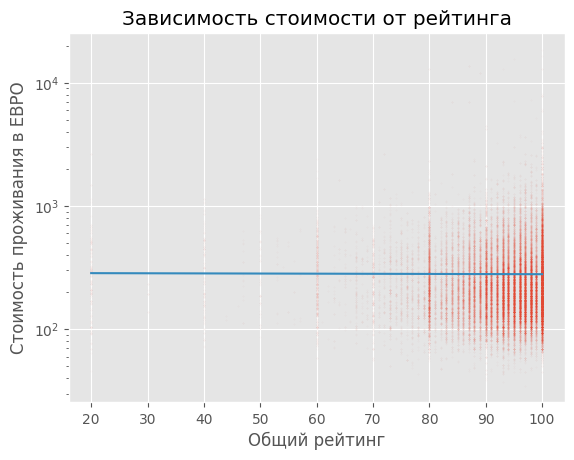

In [ ]:
guest_satisfaction_overall = city_total['guest_satisfaction_overall']
realSum = city_total['realSum']

res = linregress(guest_satisfaction_overall, realSum)
fx = np.array([guest_satisfaction_overall.min(), guest_satisfaction_overall.max()])
fy = res.intercept + res.slope * fx

plt.plot(guest_satisfaction_overall, realSum, 'x', alpha=0.02, markersize=1)
plt.plot(fx, fy)
plt.xlabel('Общий рейтинг')
plt.ylabel('Стоимость проживания в ЕВРО')
plt.yscale('log')
plt.title('Зависимость стоимости от рейтинга')
plt.show()

Гипотеза привлекательность района размещения повышает стоимость размещения



In [ ]:
# корреляция между стоимостью и привлекательностью местоположения, умеренная, более высокая привлекательность местоположения увеличивает стоимость проживания
# имеет прогностическую ценность
city_total[['realSum', 'attr_index_norm']].corr()

,realSum,attr_index_norm
realSum,1.000000,0.292395
attr_index_norm,0.292395,1.000000


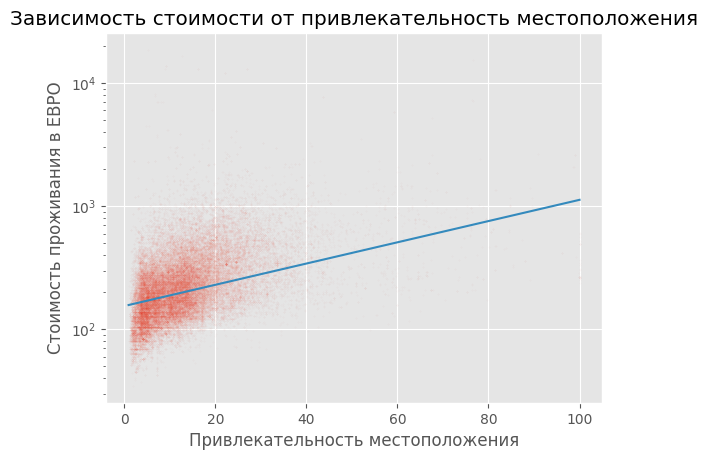

In [ ]:
attr_index_norm = city_total['attr_index_norm']
realSum = city_total['realSum']

res = linregress(attr_index_norm, realSum)
fx = np.array([attr_index_norm.min(), attr_index_norm.max()])
fy = res.intercept + res.slope * fx

plt.plot(attr_index_norm, realSum, 'x', alpha=0.02, markersize=1)
plt.plot(fx, fy)
plt.xlabel('Привлекательность местоположения')
plt.ylabel('Стоимость проживания в ЕВРО')
plt.yscale('log')
plt.title('Зависимость стоимости от привлекательность местоположения')
plt.show()

In [ ]:
#обработка отдельных датасетов по городам
paris = pd.read_csv("/content/paris_weekends.csv")

In [ ]:
# расчётный наклон, примерно 9.77 евро на 1 балл привлекательности
res.slope

9.776801238174947

Вывод:
Рейтинг номера/комнаты слабо связан со стоимостью проживания. Как правило чем больше сумма проживания, тем даже незначительно рейтинг ниже.
Привлекательность расположения умеренно связана со стоимость проживания. Более привлекательное местоположение увеливает стоимость проживания. 1 балл привлекательности увеличивает в среднем стоимость на 9.77 **евро**

Гипотеза
В выходные цена на проживание в докациях ближе к центру падает, а на периферии наоборот подрастает (в центре самое дорогое размещение и его чаще исподльзуют в будние дни, для бизнесс-поездок/в выходные люди стремятся выехать за город, к морю, например)

In [ ]:
cities = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
df_cities = []
df_cities_weekends = []
for city in cities:
    weekdays = pd.read_csv('/content/' + city + '_weekdays.csv', index_col=0)
    weekends = pd.read_csv('/content/' + city + '_weekends.csv', index_col=0)
    weekdays['city'] = city.title()
    weekdays['day_of_week'] = "weekday"
    weekends['city'] = city.title()
    weekends['day_of_week'] = "weekend"
    df_cities.append(weekdays)
    df_cities_weekends.append(weekends)
df = pd.concat(df_cities, ignore_index=True)
df_weekends = pd.concat(df_cities_weekends, ignore_index=True)

In [ ]:
df['realSum'].median()
df_weekends['realSum'].median()
price_difference = 100 - (df['realSum'].median() * 100) / df_weekends['realSum'].median()
print(f"Медианная стоимость проживания для двух человек и двух ночей в выходные выше чем в будни на {round(price_difference)} %")

Медианная стоимость проживания для двух человек и двух ночей в выходные выше чем в будни на 4 %


In [ ]:
#разделение на две группы: до 1 км от центра и дальше одного км от центра
df['dist_interval'] = pd.cut(df['dist'], [0, 1, 10])
median_realSum_by_distance = df.groupby(['dist_interval', 'city'])['realSum'].median()
median_realSum_by_distance

dist_interval  city     
(0, 1]         Amsterdam    487.427647
               Athens       177.395543
               Barcelona    225.521912
               Berlin       207.768533
               Budapest     161.441933
               Lisbon       248.241088
               London       638.773254
               Paris        438.065057
               Rome         158.978795
               Vienna       285.159993
(1, 10]        Amsterdam    417.828604
               Athens       121.622572
               Barcelona    202.597342
               Berlin       194.213331
               Budapest     142.642290
               Lisbon       205.440901
               London       257.767116
               Paris        310.606767
               Rome         182.124237
               Vienna       202.650586
Name: realSum, dtype: float64

In [ ]:
df_weekends['dist_interval'] = pd.cut(df['dist'], [0, 1, 10])
median_realSum_by_distance_weekends = df_weekends.groupby(['dist_interval', 'city'])['realSum'].median()
median_realSum_by_distance

dist_interval  city     
(0, 1]         Amsterdam    487.427647
               Athens       177.395543
               Barcelona    225.521912
               Berlin       207.768533
               Budapest     161.441933
               Lisbon       248.241088
               London       638.773254
               Paris        438.065057
               Rome         158.978795
               Vienna       285.159993
(1, 10]        Amsterdam    417.828604
               Athens       121.622572
               Barcelona    202.597342
               Berlin       194.213331
               Budapest     142.642290
               Lisbon       205.440901
               London       257.767116
               Paris        310.606767
               Rome         182.124237
               Vienna       202.650586
Name: realSum, dtype: float64

In [ ]:
df = pd.concat([df, df_weekends])
df.head(2)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_of_week,dist_interval
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekday,"(1, 10]"
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekday,"(0, 1]"


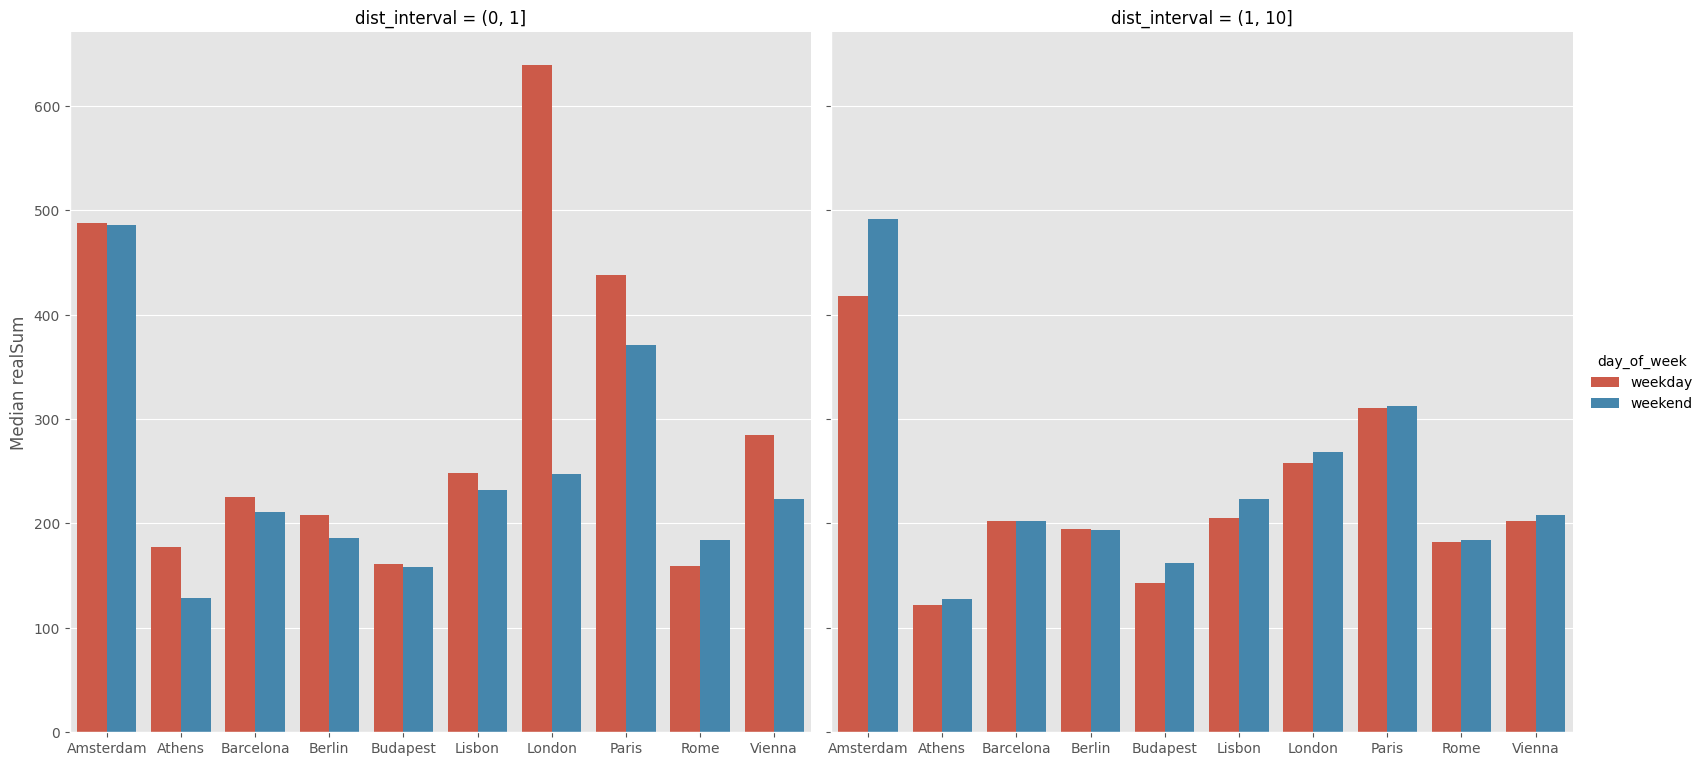

In [ ]:
df_center = df[df['dist_interval'].isin(['(0, 1]'])]
median_realSum_by_city_center_day = df.groupby(['city', 'dist_interval', 'day_of_week'])['realSum'].median().reset_index()
g = sns.catplot(x='city', y='realSum', hue='day_of_week', col='dist_interval', kind='bar', data=median_realSum_by_city_center_day, height=8, aspect=1)
g.set_axis_labels('', 'Median realSum')

Вывод: цена в на размещение в центре города имеет тенденцию снижаться в выходные, дальше от центра, наоборот, цены, как правило становятся выше

Гипотеза: цены на размещение выше в местах, близких к самым порулярным достопримечательностям

In [ ]:
#анализ проводился по отдельным городам с визуализацией на картах
paris = pd.read_csv("/content/paris_weekends.csv")
paris

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,1,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,209.752453,10.199228,540.326583,24.926525,2.38051,48.88393
3554,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,185.486701,9.019304,474.351813,21.882955,2.40050,48.85093
3555,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,172.658919,8.395552,406.585935,18.756757,2.40100,48.87700
3556,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,235.167925,11.435057,602.451672,27.792500,2.38200,48.87400


<Axes: >

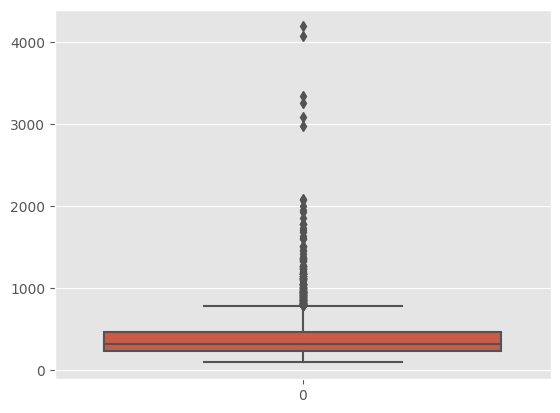

In [ ]:
sns.boxplot(paris['realSum'])
#для корректного отображениея на heatmap следует оценить датасет на наличие выбросов

In [ ]:
print(np.where(paris['realSum']>2000))

(array([ 256,  266,  498,  721, 1160, 1299, 2878, 3196, 3507]),)


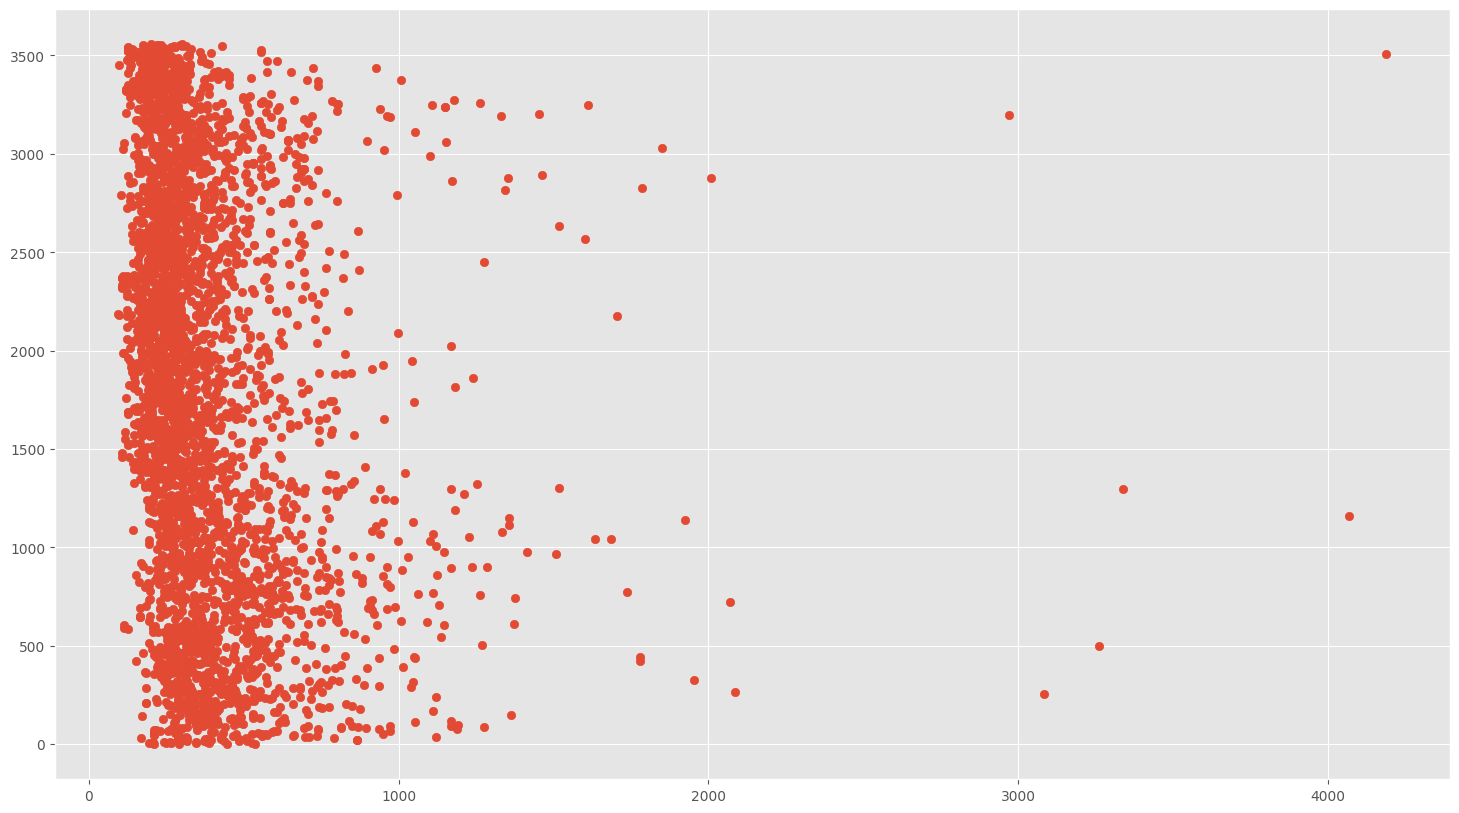

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(paris['realSum'],  paris['Unnamed: 0'])

In [ ]:
paris_clean = paris.copy()



In [ ]:
def remove_outlier(col, df):
  Q1 = np.percentile(col, 25)
  Q3 = np.percentile(col, 75)
  IQR = Q3-Q1
  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  upper_outlier = np.where(col>=upper)
  lower_outlier = np.where(col<=lower)
  df.drop(upper_outlier[0], inplace=True)
  df.drop(lower_outlier[0], inplace=True)
  return df
  
#функция, удаляющая выбросы из датасета

remove_outlier(paris_clean['realSum'], paris_clean)
# paris_clean


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,1,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3553,295.460900,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,209.752453,10.199228,540.326583,24.926525,2.38051,48.88393
3554,3554,232.081275,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,185.486701,9.019304,474.351813,21.882955,2.40050,48.85093
3555,3555,223.925809,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,172.658919,8.395552,406.585935,18.756757,2.40100,48.87700
3556,3556,200.857489,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,235.167925,11.435057,602.451672,27.792500,2.38200,48.87400


In [ ]:
paris_clean.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,1807.318978,343.686493,2.866053,0.212355,0.229284,9.252747,92.043956,0.923968,3.010066,0.226996,369.494687,17.966706,812.165066,37.467068,2.343342,48.864485
std,1020.541294,146.992101,1.130334,0.409036,0.420435,0.973187,8.735016,0.594222,1.444345,0.122526,156.611180,7.615230,280.057510,12.919706,0.033572,0.017613
min,0.000000,95.302451,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.071566,0.003220,116.297536,5.654976,258.674498,11.933258,2.247880,48.819940
25%,933.500000,236.974555,2.000000,0.000000,0.000000,9.000000,89.000000,1.000000,1.865620,0.141925,262.306131,12.754655,593.517803,27.380360,2.323000,48.851850
50%,1823.000000,307.111567,2.000000,0.000000,0.000000,9.000000,94.000000,1.000000,3.011489,0.207889,333.810459,16.231558,761.448772,35.127407,2.346750,48.866150
75%,2683.500000,422.919191,4.000000,0.000000,0.000000,10.000000,98.000000,1.000000,4.052268,0.290653,445.339064,21.654644,1022.674740,47.178370,2.367655,48.878390
max,3557.000000,788.051077,6.000000,1.000000,1.000000,10.000000,100.000000,5.000000,7.703733,1.154771,2056.552199,100.000000,2167.677121,100.000000,2.438590,48.901060


<Axes: >

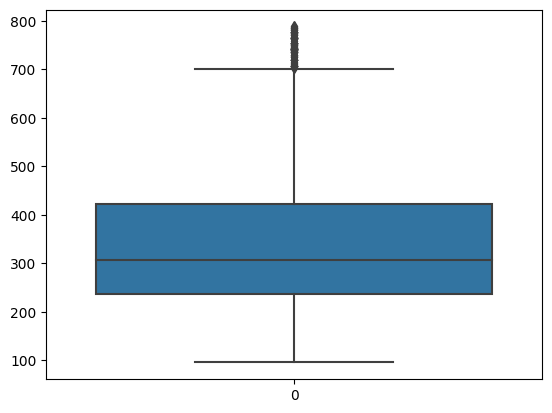

In [ ]:
sns.boxplot(paris_clean['realSum'])


In [ ]:
paris_loc = paris[["realSum", "lng", "lat"]]
realSum = paris_loc["realSum"]
lng = paris_loc["lng"]
lat = paris_loc["lat"]


In [ ]:
#координаты самых популярных достопримечательностей Парижа по версии tripadvisor
paris_poi = pd.read_csv('/content/parispoi.txt')
paris_poi

FileNotFoundError: ignored

In [ ]:
paris_map = folium.Map(location=[48.85,2.34], tiles="Cartodb Positron", zoom_start = 13)
for i in range(len(paris_poi)):
  folium.Marker(
      location = [paris_poi.iloc[i][1], paris_poi.iloc[i][2]],
      popup = paris_poi.iloc[i][0],
      icon=folium.Icon(color="red", icon="info-sign")  
      ).add_to(paris_map)
paris_map


In [ ]:
heat_data = [[lat, lng, price] for lat, lng, price in zip(paris_loc['lat'], paris_loc['lng'], paris_loc['realSum'] )]

In [ ]:
plugins.HeatMap(heat_data, radius=10, min_opacity= 0.5).add_to(paris_map)
paris_map

In [ ]:
paris_map = folium.Map(location=[48.85,2.34], tiles="Cartodb Positron", zoom_start = 13)

heat_data_norm = [[lat, lng, price] for lat, lng, price in zip(paris_clean['lat'], paris_clean['lng'], paris_clean['realSum'] )]
plugins.HeatMap(heat_data_norm, radius=10, min_opacity= 0.5).add_to(paris_map)
paris_map

Вывод: глазом не видно явной зависимости стоимости от указанных локаций. Очистка датасета от выбросов также внешне незначительно поменяла результирующую карту

In [ ]:
amsterdam_weekends = pd.read_csv('/content/amsterdam_weekends.csv')

In [ ]:
amsterdam_weekends

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137
1,1,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103
2,2,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663
3,3,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508
4,4,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,972,473.132894,Entire home/apt,False,False,2.0,False,0,0,9.0,98.0,0,1.911795,1.723938,283.762206,15.023909,351.969002,30.683248,4.86742,52.36629
973,973,491.645771,Entire home/apt,False,False,3.0,False,0,0,10.0,98.0,2,1.478016,1.465641,241.418512,12.782005,312.785000,27.267344,4.88066,52.38412
974,974,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943031,0.388542,257.946814,13.657103,336.589450,29.342520,4.90688,52.35794
975,975,399.315727,Entire home/apt,False,False,2.0,False,0,0,9.0,89.0,1,3.719001,0.882094,156.045916,8.261917,189.962216,16.560145,4.86056,52.34639


In [ ]:
amsterdam_weekends.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,488.000000,604.828018,2.769703,0.254862,0.094166,9.470829,94.685773,1.302968,2.806345,1.089285,266.868700,14.129476,329.132787,28.692478,4.889697,52.364387
std,282.179907,443.682821,1.019876,0.436007,0.292209,0.830649,6.632364,0.732949,2.036602,0.826555,193.156767,10.226766,214.384885,18.689216,0.038575,0.018213
min,0.000000,165.912872,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.036517,40.890060,2.164941,50.823991,4.430632,4.775950,52.290310
25%,244.000000,362.758653,2.000000,0.000000,0.000000,9.000000,93.000000,1.000000,1.410043,0.467145,132.719465,7.026888,170.682205,14.879391,4.869240,52.354550
50%,488.000000,491.645771,2.000000,0.000000,0.000000,10.000000,96.000000,1.000000,2.314549,0.876169,208.904591,11.060542,266.956967,23.272239,4.888100,52.365180
75%,732.000000,716.612378,4.000000,1.000000,0.000000,10.000000,99.000000,2.000000,3.610169,1.500856,366.687247,19.414411,438.109342,38.192618,4.906240,52.375250
max,976.000000,8130.668104,6.000000,1.000000,1.000000,10.000000,100.000000,5.000000,11.195932,4.411905,1888.737455,100.000000,1147.104769,100.000000,5.010770,52.415380


<Axes: >

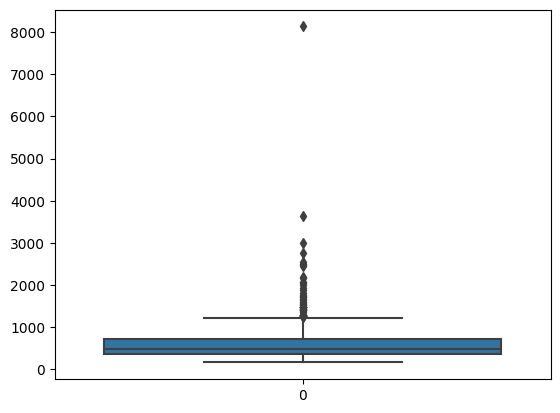

In [ ]:
sns.boxplot(data=amsterdam_weekends['realSum'])


<Axes: xlabel='realSum', ylabel='Count'>

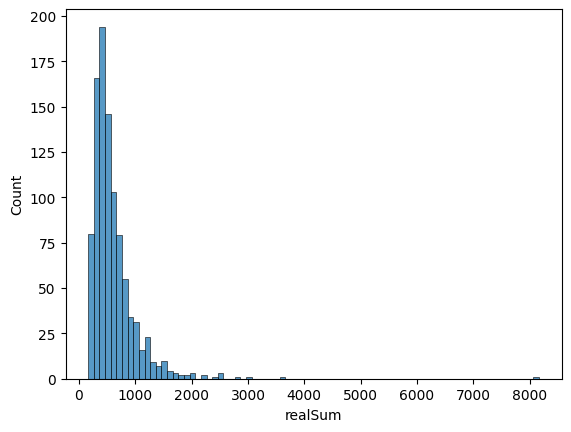

In [ ]:
sns.histplot(amsterdam_weekends['realSum'], binwidth=100)


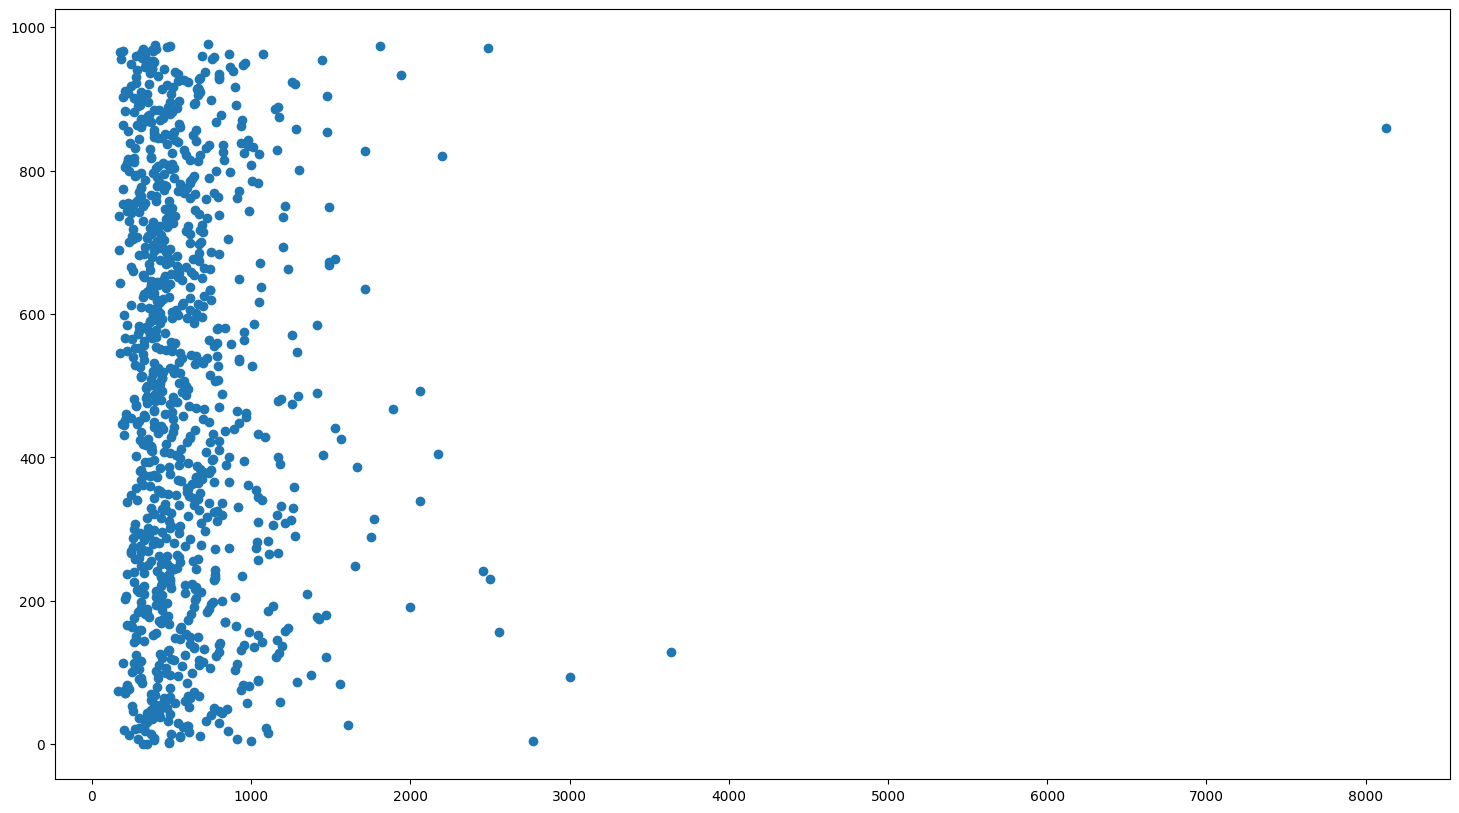

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(amsterdam_weekends['realSum'],  amsterdam_weekends['Unnamed: 0'])

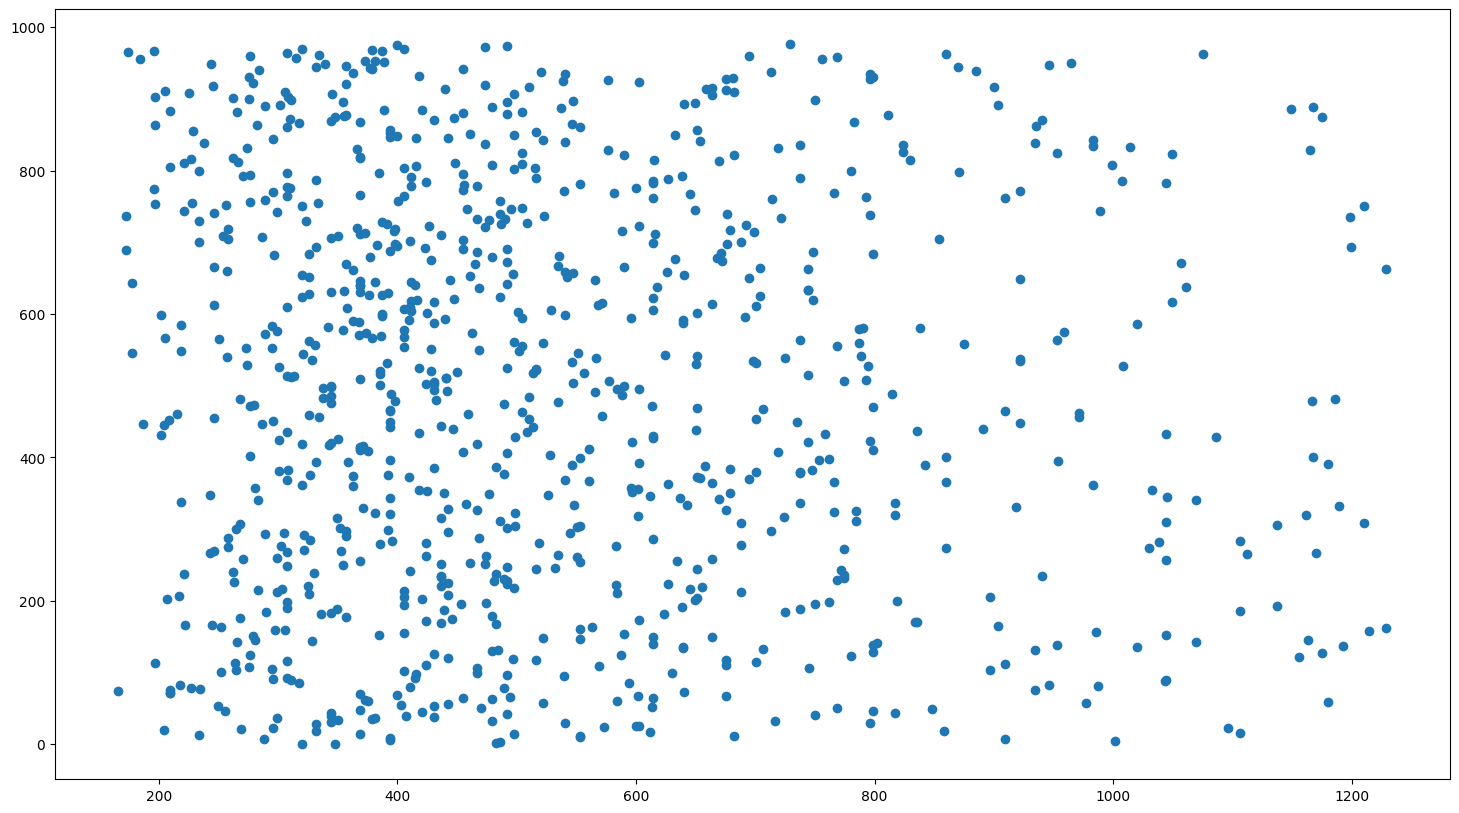

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(amsterdam_clean['realSum'],  amsterdam_clean['Unnamed: 0'])

In [ ]:
sns.boxplot(paris['realSum'])


In [ ]:
amsterdam_clean = amsterdam_weekends.copy()
remove_outlier(amsterdam_clean['realSum'], amsterdam_clean)
amsterdam_clean

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137
1,1,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103
2,2,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663
3,3,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508
5,5,1001.804420,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719139,1.196104,106.226538,5.624209,133.876300,11.670800,4.86459,52.40175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,970,405.642912,Private room,False,True,4.0,True,0,0,10.0,95.0,1,2.169236,0.212117,224.435844,11.882850,291.789702,25.437058,4.91118,52.35718
972,972,473.132894,Entire home/apt,False,False,2.0,False,0,0,9.0,98.0,0,1.911795,1.723938,283.762206,15.023909,351.969002,30.683248,4.86742,52.36629
973,973,491.645771,Entire home/apt,False,False,3.0,False,0,0,10.0,98.0,2,1.478016,1.465641,241.418512,12.782005,312.785000,27.267344,4.88066,52.38412
975,975,399.315727,Entire home/apt,False,False,2.0,False,0,0,9.0,89.0,1,3.719001,0.882094,156.045916,8.261917,189.962216,16.560145,4.86056,52.34639


<Axes: xlabel='realSum', ylabel='Count'>

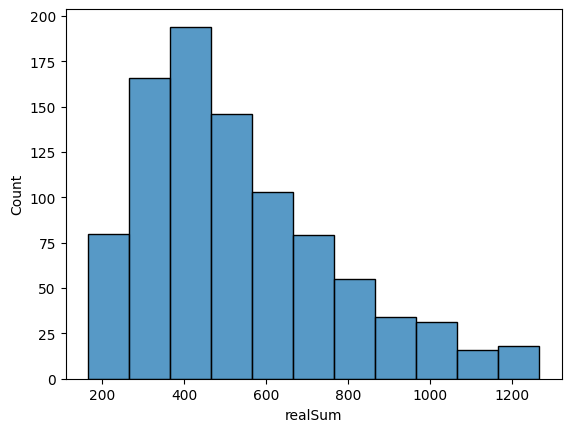

In [ ]:
sns.histplot(amsterdam_clean['realSum'], binwidth=100)


In [ ]:
amsterdam_poi = pd.read_csv("/content/poi_amsterdam.txt")
amsterdam_poi

,Location,lat,lng
0,Rijksmuseum,52.360000,4.885278
1,AnneFrankHuis,52.375580,4.884400
2,VanGoghMuseum,52.358417,4.881083
3,Vondelpark,52.358000,4.868000
4,CentraalStation,52.378282,4.900314


In [ ]:
amsterdam_map = folium.Map(location=[52.37022, 4.89517], tiles="Cartodb Positron", zoom_start = 14)
for i in range(len(amsterdam_poi)):
  folium.CircleMarker(radius = 50,
      location = [amsterdam_poi.iloc[i][1], amsterdam_poi.iloc[i][2]],
      popup = amsterdam_poi.iloc[i][0],
      icon=folium.Icon(color="red", icon="info-sign")  
      ).add_to(amsterdam_map)
amst_loc = amsterdam_weekends[["lng", "lat", "realSum"]]
heat_data = [[lat, lng, price] for lat, lng, price in zip(amst_loc['lat'], amst_loc['lng'], amst_loc['realSum'])]
plugins.HeatMap(heat_data, radius=15, min_opacity= 0.6).add_to(amsterdam_map)
amsterdam_map


In [ ]:
amsterdam_map = folium.Map(location=[52.37022, 4.89517], tiles="Cartodb Positron", zoom_start = 14)
for i in range(len(amsterdam_poi)):
  folium.CircleMarker(radius = 50,
      location = [amsterdam_poi.iloc[i][1], amsterdam_poi.iloc[i][2]],
      popup = amsterdam_poi.iloc[i][0],
      icon=folium.Icon(color="red", icon="info-sign")  
      ).add_to(amsterdam_map)
amst_loc = amsterdam_clean[["lng", "lat", "realSum"]]
heat_data2 = [[lat, lng, price] for lat, lng, price in zip(amst_loc['lat'], amst_loc['lng'], amst_loc['realSum'])]
plugins.HeatMap(heat_data2, radius=15, min_opacity= 0.6).add_to(amsterdam_map)
amsterdam_map

In [ ]:
london_poi = pd.read_csv("/content/poi_london.txt")
london_weekends = pd.read_csv("/content/london_weekends.csv")

london_map = folium.Map(location=[51.50735, -0.12776], tiles="Cartodb Positron", zoom_start = 13)

for realSum, lng, lat in zip(london_poi['location'], london_poi['lng'], london_poi['lat']):
  folium.Marker(location=[lat, lng], popup=paris_poi['location'], icon=folium.Icon(color = 'gray')).add_to(london_map)

heat_data = [[lat, lng, price] for lat, lng, price in zip(london_weekends['lat'], london_weekends['lng'], london_weekends['realSum'])]

plugins.HeatMap(heat_data, radius=10, min_opacity= 0.6).add_to(london_map)
london_map

Вывод: внешне не заметно связи, однако, города очень большие, достопримечательностей много, в идеале, нужно учесть их все. Кроме того, на стоимость очевидно будут влиять и расположение станций метро, торговых центров. Данная гипотезу следует проверить в будущем. 